In [1]:
import os
import scipy.io
import numpy as np
from scipy import signal

# Set the path to the root directory where the "Control" folder is located
data_path = "/kaggle/input/control1"

fs_original = 500
fs_new = 250

control_data = []
control_path = os.path.join(data_path, 'Control')

for foldername in os.listdir(control_path):
    subfolder_path = os.path.join(control_path, foldername)
    control_data.append(subfolder_path)

Control30 = []

for control_data_path in control_data:
    n_epochs = 105#len([f for f in os.listdir(control_data_path) if f.endswith('.mat')])
    control_arr = []
    
    for i in range(1, n_epochs+1):
        epoch_path = os.path.join(control_data_path, f"trial{i}.mat")
        mat_data = scipy.io.loadmat(epoch_path)
        mat_data1 = mat_data["trialData_i"]
        
        # Downsampling
        num_samples_original = mat_data1.shape[-1]
        num_samples_new = int(num_samples_original * fs_new / fs_original)
        downsampled_data = signal.resample(mat_data1, num_samples_new, axis=-1)
        
        control_arr.append(np.array(downsampled_data))
        
    Control30.append(np.array(control_arr))

Control30 = np.array(Control30)
print(Control30[0].shape)


(105, 60, 1000)


In [2]:
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import entropy

delta_band = (0.5, 4)
alpha_band = (8, 12)
beta_band = (12, 35)

all_control_power = []
scaler = MinMaxScaler()
epsilon = 1e-10

# Normalizing the features
for i in range(len(Control30)):
    control_data = Control30[i]
    control_power = []
    for epoch in control_data:
        epoch_power = []
        for channel_data in epoch:
            freq_spectrum = np.fft.fft(channel_data)
            power_spectrum = np.abs(freq_spectrum) ** 2

            alpha_power = np.sum(power_spectrum[(alpha_band[0] <= freq_spectrum) & (freq_spectrum <= alpha_band[1])])
            beta_power = np.sum(power_spectrum[(beta_band[0] <= freq_spectrum) & (freq_spectrum <= beta_band[1])])
            delta_power = np.sum(power_spectrum[(delta_band[0] <= freq_spectrum) & (freq_spectrum <= delta_band[1])])

            channel_min_value = np.min(channel_data)
            channel_max_value = np.max(channel_data)

            # alpha_power_normalized = (alpha_power - channel_min_value) / (4*((channel_max_value-channel_min_value) * (channel_max_value-channel_min_value )))
            # beta_power_normalized = (beta_power - channel_min_value) /  (4*((channel_max_value-channel_min_value) * (channel_max_value-channel_min_value) ))
            # delta_power_normalized = (delta_power - channel_min_value) /  (4*((channel_max_value-channel_min_value) * (channel_max_value-channel_min_value)))

            power_spectrum_adjusted = power_spectrum + epsilon
            entropy_values = entropy(power_spectrum_adjusted)
            values=np.array([alpha_power,beta_power,delta_power,entropy_values])
            rescaled_values = (values - values.min()) * (channel_max_value - channel_min_value) / (values.max() - values.min()) + channel_min_value
            concatenated_data = np.concatenate((channel_data, rescaled_values))

            #concatenated_data = np.concatenate((channel_data, [alpha_power_normalized, beta_power_normalized, delta_power_normalized, entropy_values]))
            #print(alpha_power_normalized, beta_power_normalized, delta_power_normalized, entropy_values)
            epoch_power.append(concatenated_data.tolist())

        control_power.append(np.array(epoch_power))

    all_control_power.append(np.array(control_power))

all_control_power = np.array(all_control_power)
print(all_control_power.shape)
print(len(Control30))


(30, 105, 60, 1004)
30


In [3]:
import os
import scipy.io
import numpy as np
from scipy import signal
data_path = "/kaggle/input/concussed1"
fs_original = 500
fs_new = 250  

concussed_data = []
concussed_path = os.path.join(data_path, 'Concussed')
for foldername in os.listdir(concussed_path):
    subfolder_path = os.path.join(concussed_path, foldername)
    concussed_data.append(subfolder_path)

Concussed52 = []
for concussed_data_path in concussed_data:
    n_epochs = 105 #len([f for f in os.listdir(control_data_path) if f.endswith('.mat')])
    concussed_arr = []
    for i in range(1, n_epochs+1):
        epoch_path = f"{concussed_data_path}/trial{i}.mat"
        mat_data = scipy.io.loadmat(epoch_path)
        mat_data1 = mat_data["trialData_i"]
        
        # Downsampling
        num_samples_original = mat_data1.shape[-1]
        num_samples_new = int(num_samples_original * fs_new / fs_original)
        downsampled_data = signal.resample(mat_data1, num_samples_new, axis=-1)
        
        concussed_arr.append(np.array(downsampled_data))
        
    Concussed52.append(np.array(concussed_arr))

Concussed52 = np.array(Concussed52)
print( Concussed52[0].shape)


(105, 60, 1000)


In [4]:
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import entropy

delta_band = (0.5, 4)
alpha_band = (8, 12)
beta_band = (12, 35)

all_concussed_power = []
scaler = MinMaxScaler()
epsilon = 1e-10

# Normalizing the features within the range of the minimum and maximum values of the corresponding channel
for i in range(len(Concussed52)):
    concussed_data = Concussed52[i]
    concussed_power = []
    for epoch in concussed_data:
        epoch_power = []
        for channel_data in epoch:
            freq_spectrum = np.fft.fft(channel_data)
            power_spectrum = np.abs(freq_spectrum) ** 2

            alpha_power = np.sum(power_spectrum[(alpha_band[0] <= freq_spectrum) & (freq_spectrum <= alpha_band[1])])
            beta_power = np.sum(power_spectrum[(beta_band[0] <= freq_spectrum) & (freq_spectrum <= beta_band[1])])
            delta_power = np.sum(power_spectrum[(delta_band[0] <= freq_spectrum) & (freq_spectrum <= delta_band[1])])

            channel_min_value = np.min(channel_data)
            channel_max_value = np.max(channel_data)

            # alpha_power_normalized = (alpha_power - channel_min_value) / (4*((channel_max_value-channel_min_value) * (channel_max_value-channel_min_value )))
            # beta_power_normalized = (beta_power - channel_min_value) /  (4*((channel_max_value-channel_min_value) * (channel_max_value-channel_min_value) ))
            # delta_power_normalized = (delta_power - channel_min_value) /  (4*((channel_max_value-channel_min_value) * (channel_max_value-channel_min_value)))

            power_spectrum_adjusted = power_spectrum + epsilon
            entropy_values = entropy(power_spectrum_adjusted)
            values=np.array([alpha_power,beta_power,delta_power,entropy_values])
            rescaled_values = (values - values.min()) * (channel_max_value - channel_min_value) / (values.max() - values.min()) + channel_min_value
            concatenated_data = np.concatenate((channel_data, rescaled_values))

            #concatenated_data = np.concatenate((channel_data, [alpha_power_normalized, beta_power_normalized, delta_power_normalized, entropy_values]))
            #print(alpha_power_normalized, beta_power_normalized, delta_power_normalized, entropy_values)
            epoch_power.append(concatenated_data.tolist())

        concussed_power.append(np.array(epoch_power))

    all_concussed_power.append(np.array(concussed_power))

all_concussed_power = np.array(all_concussed_power)
print(all_concussed_power.shape)
print(len(Concussed52))


(49, 105, 60, 1004)
49


In [5]:
dataset = np.concatenate((all_control_power, all_concussed_power), axis=0)
labels = np.concatenate((np.zeros(len(all_control_power)), np.ones(len(all_concussed_power))))


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(dataset, labels, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)



X_train shape: (63, 105, 60, 1004)
y_train shape: (63,)
X_val shape: (16, 105, 60, 1004)
y_val shape: (16,)


In [7]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

input_shape = (105, 60, 1004)  # Input shape of your EEG data

model = tf.keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), strides=2, activation='relu', padding='same', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.6))
model.add(layers.Conv2D(64, kernel_size=(3, 3), strides=2, activation='relu', padding='same', kernel_regularizer=l2(0.1)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.6))
model.add(layers.Conv2D(128, kernel_size=(3, 3), strides=2, activation='relu', padding='same', kernel_regularizer=l2(0.1)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.6))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 53, 30, 32)        289184    
                                                                 
 batch_normalization (BatchN  (None, 53, 30, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 53, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 15, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 27, 15, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 27, 15, 64)        0

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
callback_list = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True)

In [9]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [10]:
from sklearn.model_selection import KFold
X =dataset
y = labels 
Epoch = 100
batchSize = 32

# Define the number of folds for cross-validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True)

train_accuracies = []
val_accuracies = []

# cross-validation
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    history = model.fit(
    X_train,
    y_train,
    epochs=Epoch,
    batch_size=batchSize,
    validation_data=(X_val, y_val),
    callbacks=callback_list,
    verbose=1)

    # Evaluate the model on training and validation data
    train_loss, train_accuracy = model.evaluate(X_train, y_train)
    val_loss, val_accuracy = model.evaluate(X_val, y_val)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)



Epoch 1/100
2/2 [==============================] - 8s 3s/step - loss: 13.6765 - accuracy: 0.6349 - val_loss: 15.6827 - val_accuracy: 0.4375
Epoch 2/100
2/2 [==============================] - 4s 2s/step - loss: 14.3126 - accuracy: 0.4921 - val_loss: 15.0505 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 4s 2s/step - loss: 14.5958 - accuracy: 0.4603 - val_loss: 14.4265 - val_accuracy: 0.3750
Epoch 4/100
2/2 [==============================] - 4s 2s/step - loss: 13.4810 - accuracy: 0.6190 - val_loss: 14.0895 - val_accuracy: 0.3750
Epoch 5/100
2/2 [==============================] - 4s 2s/step - loss: 13.6642 - accuracy: 0.5397 - val_loss: 13.8232 - val_accuracy: 0.3750
Epoch 6/100
2/2 [==============================] - 4s 2s/step - loss: 14.2255 - accuracy: 0.4603 - val_loss: 13.6127 - val_accuracy: 0.3750
Epoch 7/100
2/2 [==============================] - 4s 2s/step - loss: 13.7832 - accuracy: 0.4286 - val_loss: 13.5049 - val_accuracy: 0.3750
Epoch 8/100
2/2 [===

In [11]:
# Calculate the average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_val_accuracy = np.mean(val_accuracies)

print('Average Training Accuracy:', avg_train_accuracy)
print('Average Validation Accuracy:', avg_val_accuracy)


Average Training Accuracy: 0.9047619104385376
Average Validation Accuracy: 0.7375


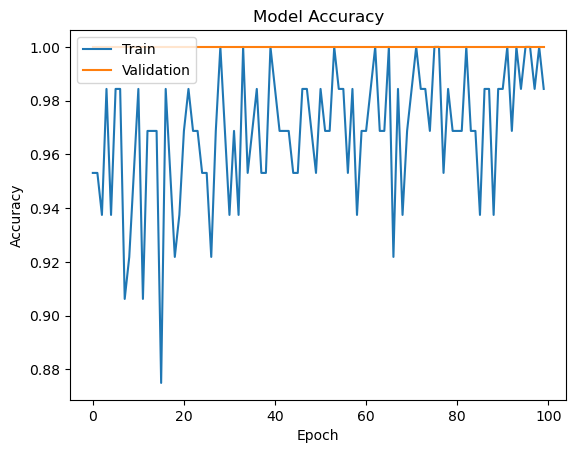

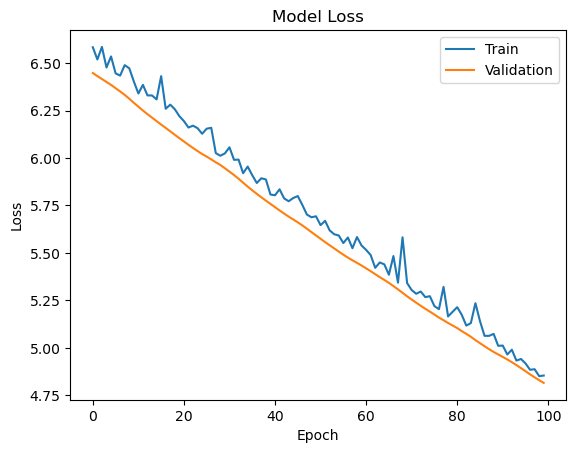

In [12]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [13]:
from sklearn.metrics import classification_report, confusion_matrix

# predictions
y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)

# Confusion matrix
print('Confusion Matrix')
cm = confusion_matrix(y_val, y_pred)
print(cm)
print('\n')
target_names = ['Normal', 'Concussed']
# Classification report
print('Classification Report')
print(classification_report(y_val, y_pred, target_names=target_names))


1/1 [==============================] - 1s 819ms/step
Confusion Matrix
[[6 0]
 [9 0]]


Classification Report
              precision    recall  f1-score   support

      Normal       0.40      1.00      0.57         6
   Concussed       0.00      0.00      0.00         9

    accuracy                           0.40        15
   macro avg       0.20      0.50      0.29        15
weighted avg       0.16      0.40      0.23        15



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
